# ERP calculation using mne
### import


In [2]:
import pickle
from scipy import signal
import itertools
import signal
import mne
import os
import scipy.io as scio
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
%matplotlib inline


## Load Task file

In [3]:
list_tasks_info = pd.read_csv('../task_track_files/task_track_file_matlab.csv', usecols=[
                              'local_file_path', 'raw_data_file_name', 'Group_file_type', 'preprocessed_one', 'ERP_npy_file_with_normalization_and_baseline_correction', 'ERP_nobaseline_npy_file'])
num_task_file = list_tasks_info.shape[0]
list_tasks_info


,local_file_path,raw_data_file_name,preprocessed_one,ERP_npy_file_with_normalization_and_baseline_correction,ERP_nobaseline_npy_file,Group_file_type
0,sub-001/ses-01/eeg/,sub-001_ses-01_task-Rest_eeg.set,pre_sub-001_ses-01_task-Rest_eeg.set,ERP_base_correct_normalization_sub-001_ses-01_...,ERP_nb_correct_sub-001_ses-01_task-Rest_eeg.npy,PD_ON
1,sub-001/ses-02/eeg/,sub-001_ses-02_task-Rest_eeg.set,pre_sub-001_ses-02_task-Rest_eeg.set,ERP_base_correct_normalization_sub-001_ses-02_...,ERP_nb_correct_sub-001_ses-02_task-Rest_eeg.npy,PD_OFF
2,sub-002/ses-01/eeg/,sub-002_ses-01_task-Rest_eeg.set,pre_sub-002_ses-01_task-Rest_eeg.set,ERP_base_correct_normalization_sub-002_ses-01_...,ERP_nb_correct_sub-002_ses-01_task-Rest_eeg.npy,PD_ON
3,sub-002/ses-02/eeg/,sub-002_ses-02_task-Rest_eeg.set,pre_sub-002_ses-02_task-Rest_eeg.set,ERP_base_correct_normalization_sub-002_ses-02_...,ERP_nb_correct_sub-002_ses-02_task-Rest_eeg.npy,PD_OFF
4,sub-003/ses-01/eeg/,sub-003_ses-01_task-Rest_eeg.set,pre_sub-003_ses-01_task-Rest_eeg.set,ERP_base_correct_normalization_sub-003_ses-01_...,ERP_nb_correct_sub-003_ses-01_task-Rest_eeg.npy,CTL
...,...,...,...,...,...,...
70,sub-046/ses-01/eeg/,sub-046_ses-01_task-Rest_eeg.set,pre_sub-046_ses-01_task-Rest_eeg.set,ERP_base_correct_normalization_sub-046_ses-01_...,ERP_nb_correct_sub-046_ses-01_task-Rest_eeg.npy,CTL
71,sub-047/ses-01/eeg/,sub-047_ses-01_task-Rest_eeg.set,pre_sub-047_ses-01_task-Rest_eeg.set,ERP_base_correct_normalization_sub-047_ses-01_...,ERP_nb_correct_sub-047_ses-01_task-Rest_eeg.npy,CTL
72,sub-048/ses-01/eeg/,sub-048_ses-01_task-Rest_eeg.set,pre_sub-048_ses-01_task-Rest_eeg.set,ERP_base_correct_normalization_sub-048_ses-01_...,ERP_nb_correct_sub-048_ses-01_task-Rest_eeg.npy,CTL
73,sub-049/ses-01/eeg/,sub-049_ses-01_task-Rest_eeg.set,pre_sub-049_ses-01_task-Rest_eeg.set,ERP_base_correct_normalization_sub-049_ses-01_...,ERP_nb_correct_sub-049_ses-01_task-Rest_eeg.npy,CTL


## Load EEG signals and ERP calculation
### Baseline Correction applied


In [ ]:
Path = 'D:\Mastersharif\MasterProject\data\parkinsons-oddball'
montage = mne.channels.read_custom_montage('Standard-10-20-Cap81.locs')
dict_temp = {'S200': 5, 'S201': 6, 'S202': 7}
ERP = {'S200': [], 'S201': [], 'S202': []}
ERP_array = np.zeros([3, 63, 601], dtype=np.float64)
for i in np.arange(num_task_file):
    Path_to_load_file = os.path.join(
        Path, list_files_path_name['local_file_path'][i], list_files_path_name['preprocessed_one'][i])
    Path_to_save_file = os.path.join(
        Path, list_files_path_name['local_file_path'][i], list_files_path_name['ERP_npy_file'][i])
    if not os.path.isfile(Path_to_save_file):
        EEG = mne.io.read_raw_eeglab(Path_to_load_file, eog=(), preload=True)

        events, event_dict = mne.events_from_annotations(EEG, verbose=0)
        t = events[events[:, 2] == 5]
        # t1 = mne.pick_events(events,include=[5])
        t2 = {'S200': 5}
        pochs_1 = mne.Epochs(EEG, events=t, event_id=t2,
                             tmin=0.250, tmax=1.450, baseline=(0.250, 0.450), preload=True, verbose=0)
        ERP['S200'] = pochs_1['S200'].average().to_data_frame()
        del ERP['S200']['time']
        ERP_array[0, :, :] = np.transpose(ERP['S200'].to_numpy())

        t = events[events[:, 2] == 6]
        t2 = {'S201': 6}
        pochs_1 = mne.Epochs(EEG, events=t, event_id=t2,
                             tmin=0.250, tmax=1.450, baseline=(0.250, 0.450), preload=True, verbose=0)
        ERP['S201'] = pochs_1['S201'].average().to_data_frame()
        del ERP['S201']['time']
        ERP_array[1, :, :] = np.transpose(ERP['S201'].to_numpy())

        t = events[events[:, 2] == 7]
        t2 = {'S202': 7}
        pochs_1 = mne.Epochs(EEG, events=t, event_id=t2,
                             tmin=-0.2, tmax=1, baseline=(-0.2, 0), preload=True, verbose=0)
        ERP['S202'] = pochs_1['S202'].average().to_data_frame()
        del ERP['S202']['time']
        ERP_array[2, :, :] = np.transpose(ERP['S202'].to_numpy())

        stimulus_number = 1
        Channel_num = 1

        plt.plot(ERP_array[stimulus_number, Channel_num, :])

        np.save(Path_to_save_file, ERP_array)


# events[:,2]


### Applying normalization

In [6]:
# Path = 'D:\Mastersharif\MasterProject\data\parkinsons-oddball'
Path = 'C:\\Users\\Mohammad\\Desktop\\temp_file\\Send_to_google_drive'
montage = mne.channels.read_custom_montage('Standard-10-20-Cap81.locs')
dict_temp = {'S200': 5, 'S201': 6, 'S202': 7}
ERP = {'S200': [], 'S201': [], 'S202': []}
ERP_array = np.zeros([3, 63, 601], dtype=np.float64)
for i in np.arange(num_task_file):
    Path_to_load_file = os.path.join(
        Path, list_tasks_info['local_file_path'][i], list_tasks_info['preprocessed_one'][i])
    Path_to_save_file = os.path.join(
        Path, list_tasks_info['local_file_path'][i], list_tasks_info['ERP_npy_file_with_normalization_and_baseline_correction'][i])
    if not os.path.isfile(Path_to_save_file):
        EEG = mne.io.read_raw_eeglab(Path_to_load_file, eog=(), preload=True)

        std_per_ch = np.std(EEG._data, axis=1)
        mean_per_ch = np.mean(EEG._data, axis=1)
        mean_per_ch = np.expand_dims(mean_per_ch, axis=1)
        std_per_ch = np.expand_dims(std_per_ch, axis=1)
        temp1 = (EEG._data - mean_per_ch)
        temp2 = temp1/std_per_ch
        EEG._data = temp2*1e-6

        events, event_dict = mne.events_from_annotations(EEG, verbose=0)
        t = events[events[:, 2] == 5]
        # t1 = mne.pick_events(events,include=[5])
        t2 = {'S200': 5}
        pochs_1 = mne.Epochs(EEG, events=t, event_id=t2,
                             tmin=0.250, tmax=1.450, baseline=(0.250, 0.450), preload=True, verbose=0)
        ERP['S200'] = pochs_1['S200'].average().to_data_frame()
        del ERP['S200']['time']
        ERP_array[0, :, :] = np.transpose(ERP['S200'].to_numpy())

        t = events[events[:, 2] == 6]
        t2 = {'S201': 6}
        pochs_1 = mne.Epochs(EEG, events=t, event_id=t2,
                             tmin=0.250, tmax=1.450, baseline=(0.250, 0.450), preload=True, verbose=0)
        ERP['S201'] = pochs_1['S201'].average().to_data_frame()
        del ERP['S201']['time']
        ERP_array[1, :, :] = np.transpose(ERP['S201'].to_numpy())

        t = events[events[:, 2] == 7]
        t2 = {'S202': 7}
        pochs_1 = mne.Epochs(EEG, events=t, event_id=t2,
                             tmin=-0.2, tmax=1, baseline=(-0.2, 0), preload=True, verbose=0)
        ERP['S202'] = pochs_1['S202'].average().to_data_frame()
        del ERP['S202']['time']
        ERP_array[2, :, :] = np.transpose(ERP['S202'].to_numpy())

        stimulus_number = 1
        Channel_num = 1

        plt.plot(ERP_array[stimulus_number, Channel_num, :])

        np.save(Path_to_save_file, ERP_array)


Reading C:\Users\Mohammad\Desktop\temp_file\Send_to_google_drive\sub-001\ses-01\eeg\pre_sub-001_ses-01_task-Rest_eeg.fdt
Reading 0 ... 294099  =      0.000 ...   588.198 secs...


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Mohammad\\Desktop\\temp_file\\Send_to_google_drive\\sub-001\\ses-01\\eeg\\pre_sub-001_ses-01_task-Rest_eeg.fdt'

## Calculate Digit_sequences

In [ ]:
Path = 'D:\Mastersharif\MasterProject\data\parkinsons-oddball'
Path_to_digit_sequences = 'D:\Mastersharif\MasterProject\data\parkinsons-oddball\EEG_feature\digit_sequences'
montage = mne.channels.read_custom_montage('Standard-10-20-Cap81.locs')
dict_temp = {'S200': 5, 'S201': 6, 'S202': 7}
ERP = {'S200': [], 'S201': [], 'S202': []}
ERP_array = np.zeros([3, 63, 601], dtype=np.float64)
for i in np.arange(num_task_file):
    Path_to_load_file = os.path.join(
        Path, list_files_path_name['local_file_path'][i], list_files_path_name['preprocessed_one'][i])
    Temp = list_files_path_name['raw_data_file_name'][i][0:-4]
    Path_to_save_dir = os.path.join(Path_to_digit_sequences, Temp)
    Path_to_save_file = os.path.join(Path_to_save_dir, 'digit_sequences.npy')
    if os.path.isfile(Path_to_save_file):
        if not os.path.isdir(Path_to_save_dir):
            os.mkdir(Path_to_save_dir)
        EEG = mne.io.read_raw_eeglab(Path_to_load_file, eog=(), preload=True)

        events, event_dict = mne.events_from_annotations(EEG, verbose=0)
        events = mne.pick_events(
            events, include=[event_dict['S200'], event_dict['S201'], event_dict['S202']])
        digit_sequences = events[:, 2]-4

        np.save(Path_to_save_file, digit_sequences)


### No baseline Correction


In [ ]:
# Path = 'D:\Mastersharif\MasterProject\data\parkinsons-oddball'
# montage = mne.channels.read_custom_montage('Standard-10-20-Cap81.locs')
dict_temp = {'S200': 5, 'S201': 6, 'S202': 7}
ERP = {'S200': [], 'S201': [], 'S202': []}
ERP_array = np.zeros([3, 63, 601], dtype=np.float64)
for i in np.arange(num_task_file):
    Path_to_load_file = os.path.join(
        Path, list_files_path_name['local_file_path'][i], list_files_path_name['preprocessed_one'][i])
    Path_to_save_file = os.path.join(
        Path, list_files_path_name['local_file_path'][i], list_files_path_name['ERP_nobaseline_npy_file'][i])
    if not os.path.isfile(Path_to_save_file):
        EEG = mne.io.read_raw_eeglab(Path_to_load_file, eog=(), preload=True)

        events, event_dict = mne.events_from_annotations(EEG, verbose=0)
        t = events[events[:, 2] == 5]
        # t1 = mne.pick_events(events,include=[5])
        t2 = {'S200': 5}
        pochs_1 = mne.Epochs(EEG, events=t, event_id=t2,
                             tmin=0.250, tmax=1.450, baseline=None, preload=True, verbose=0)
        ERP['S200'] = pochs_1['S200'].average().to_data_frame()
        del ERP['S200']['time']
        ERP_array[0, :, :] = np.transpose(ERP['S200'].to_numpy())

        t = events[events[:, 2] == 6]
        t2 = {'S201': 6}
        pochs_1 = mne.Epochs(EEG, events=t, event_id=t2,
                             tmin=0.250, tmax=1.450, baseline=None, preload=True, verbose=0)
        ERP['S201'] = pochs_1['S201'].average().to_data_frame()
        del ERP['S201']['time']
        ERP_array[1, :, :] = np.transpose(ERP['S201'].to_numpy())

        t = events[events[:, 2] == 7]
        t2 = {'S202': 7}
        pochs_1 = mne.Epochs(EEG, events=t, event_id=t2,
                             tmin=-0.2, tmax=1, baseline=None, preload=True, verbose=0)
        ERP['S202'] = pochs_1['S202'].average().to_data_frame()
        del ERP['S202']['time']
        ERP_array[2, :, :] = np.transpose(ERP['S202'].to_numpy())

        np.save(Path_to_save_file, ERP_array)


## Load and plot ERP

### Check and compare the result with matlab calculation



In [ ]:
Channel_num = 62
subject_num = 34


Path_to_save_file = os.path.join(
    Path, list_files_path_name['local_file_path'][subject_num], list_files_path_name['ERP_npy_file'][subject_num])
test_ERP_array = np.load(Path_to_save_file)

test_dict = scio.loadmat('..\matlab\\test_ERP.mat')
ERP_matlab = test_dict['test_ERP']


plt.plot(test_ERP_array[0, Channel_num, :])


plt.plot(ERP_matlab[0, :])
plt.legend(["ERP py", "ERP mat"])
plt.show()


## Calculation of Power Spectrum of ERP signal
### Dealing with non stationary signal, we use welch's method to do power analysis of erp signal

At first load appropriate set of ERP

In [6]:
Path = 'D:\Mastersharif\MasterProject\data\parkinsons-oddball'
ERP_collection = np.zeros([3, 25, 3, 63, 601])
list_tasks_info.shape[0]
counter_PD_on = 0
counter_PD_off = 0
counter_CTL = 0
for i in np.arange(num_task_file):
    Path_to_save_file = os.path.join(
        Path, list_tasks_info['local_file_path'][i], list_tasks_info['ERP_npy_file_with_normalization_and_baseline_correction'][i])
    ERP_array = np.load(Path_to_save_file)
    if list_tasks_info['Group_file_type'][i] == 'PD_ON':
        ERP_collection[0, counter_PD_on, :, :, :] = ERP_array
        counter_PD_on = counter_PD_on + 1
    elif list_tasks_info['Group_file_type'][i] == 'PD_OFF':
        ERP_collection[1, counter_PD_off, :, :, :] = ERP_array
        counter_PD_off = counter_PD_off + 1
    elif list_tasks_info['Group_file_type'][i] == 'CTL':
        ERP_collection[2, counter_CTL, :, :, :] = ERP_array
        counter_CTL = counter_CTL + 1


## Test Steps
### They are going to be removed 

## Check the output of hamming window

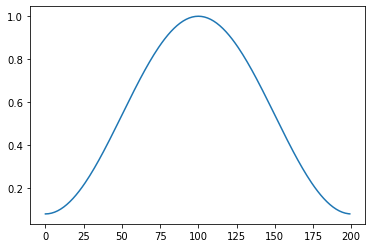

In [9]:

plt.plot(M)


(601,)
(301,)
(2, 301)


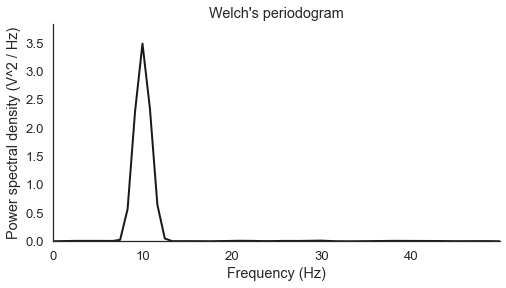

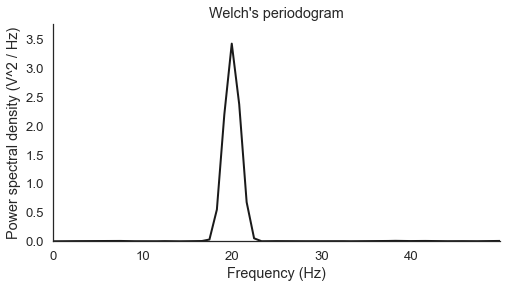

In [59]:
Subject_num = 1
Group_num = 1
Stimulus_num = 1
ch_num = 1

# Define window length (4 seconds)
Fs = 500

M = signal.windows.hamming(300, sym=False)
t = np.linspace(0, 1.2, 601)
print(t.shape)
temp = np.random.randn(3, 25, 3, 63, 601)

data = np.concatenate((data1, data2), axis=0)


freqs, psd = signal.welch(data, Fs, window=M, nfft=601, scaling='density')
print(freqs.shape)
print(psd.shape)
# Plot the power spectrum
sns.set(font_scale=1.2, style='white')
plt.figure(figsize=(8, 4))
plt.plot(freqs, psd[0], color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd[0].max() * 1.1])
plt.title("Welch's periodogram")
plt.xlim([0, freqs.max()/5])
sns.despine()
sns.set(font_scale=1.2, style='white')
plt.figure(figsize=(8, 4))
plt.plot(freqs, psd[1], color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd[1].max() * 1.1])
plt.title("Welch's periodogram")
plt.xlim([0, freqs.max()/5])
sns.despine()


### Calculate Power Spectrum for all ERP signals

In [61]:
# Define type of window and it's length
window_length = 300
M = signal.windows.hamming(window_length, sym=False)
Fs = 500
freqs, ERP_collection_psd = signal.welch(
    ERP_collection, Fs, window=M, nfft=601, scaling='spectrum')


### Calculation Bin Power Band

In [85]:
power_bands = ['Delta', 'Theta', 'Alpha', 'Sigma', 'Beta', 'Gamma']
power_bands_num = {'Delta': 0, 'Theta': 1,'Alpha': 2, 'Sigma': 3, 'Beta': 4, 'Gamma': 5}

dict_fre_band = {'Delta': [1, 4.5], 'Theta': [4.75, 7.75], 'Alpha': [8, 12.25], 'Sigma': [12.5, 15], 'Beta': [15.25, 24.75], 'Gamma': [25, 34.75]}
dict_fre_band_sample = {}
step_fre = freqs[1]-freqs[0]
for i in np.arange(6):
    start_sample = int(dict_fre_band[power_bands[i]][0]//step_fre)
    end_sample = int(dict_fre_band[power_bands[i]][1]//step_fre)
    dict_fre_band_sample[power_bands[i]] = [start_sample, end_sample]


In [75]:
ERP_collection_power_band = np.zeros(shape=[3, 25, 3, 63, 6])
for i in np.arange(6):
    start_sample = dict_fre_band_sample[power_bands[i]][0]
    end_sample = dict_fre_band_sample[power_bands[i]][1]
    ERP_collection_power_band[:, :, :, :, i] = np.sum(
    ERP_collection_psd[:, :, :, :, start_sample:end_sample], axis=4)


(3, 25, 3, 63, 1)


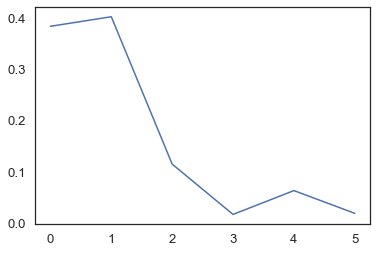

In [81]:
# plt.plot(ERP_collection_power_band[Group_num,Subject_num,Stimulus_num,ch_num,:])
temp = np.expand_dims(np.sum(ERP_collection_power_band, axis=4), axis=4)
print(temp.shape)
ERP_collection_power_band_percentage = ERP_collection_power_band/temp


### Plot topography of power band

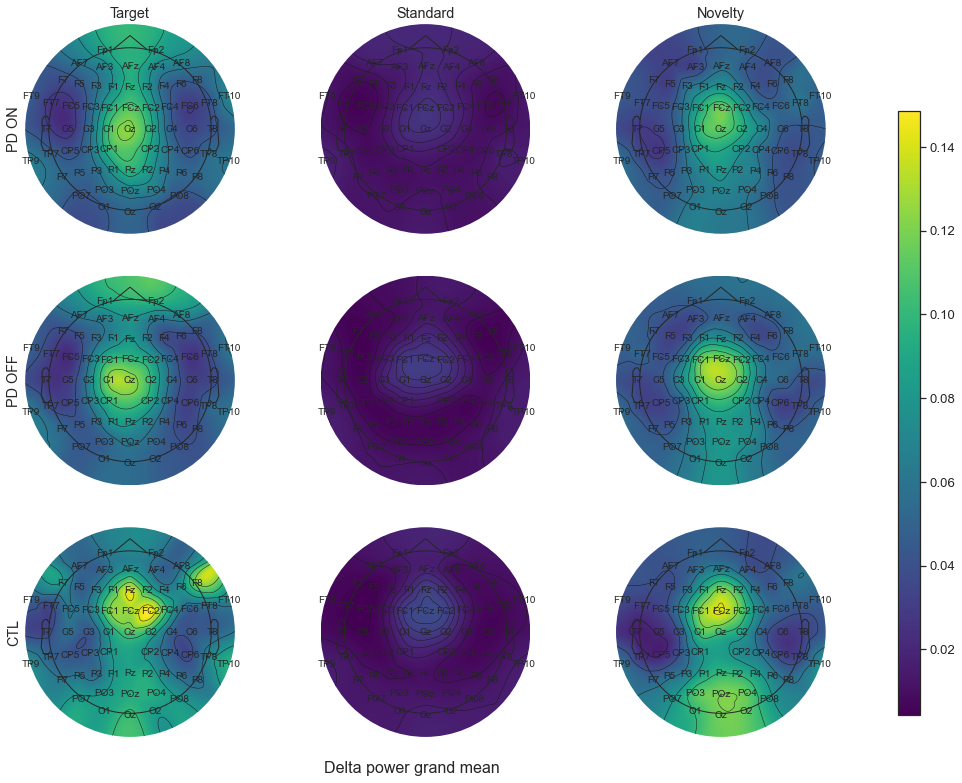

In [121]:
Path_to_save_fig = 'D:\Mastersharif\MasterProject\Working_with_kiani\\articles\Result_on_articles'
groups = ['PD ON', 'PD OFF', 'CTL']
event_types = ['Target', 'Standard', 'Novelty']


fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(15, 12))
for i in range(3):
    axs[i, 0].set_ylabel(groups[i])
    axs[0, i].set_title(event_types[i])
    axs[-1, i].xaxis.set_visible(True)
    axs[i, 0].yaxis.set_visible(True)

with open('..\data\channels_name.pkl', 'rb') as f:
    channels_name = pickle.load(f)

mne_info = mne.create_info(ch_names=channels_name, sfreq=500., ch_types='eeg')

montage = mne.channels.read_custom_montage('Standard-10-20-Cap81.locs')
band_num = power_bands_num['Delta']
Data = ERP_collection_power_band[:, :, :, :, band_num]
Data_grand_mean = np.mean(Data, axis=1)
vmax = np.max(Data_grand_mean)
vmin = np.min(Data_grand_mean)
for i, j in itertools.product(range(3), range(3)):
    #     data = mvls[i, :, j, :].mean(axis=0).reshape((-1, 1))
    temp = np.expand_dims(Data_grand_mean[i, j, :], axis=1)
    Power_band_grand_mean = mne.EvokedArray(temp, mne_info)
    Power_band_grand_mean.set_montage(montage)
    im, cm = mne.viz.plot_topomap(Power_band_grand_mean.data[:, 0],
                                  Power_band_grand_mean.info, axes=axs[i,
                                                                       j], show=False,
                                  names=channels_name, show_names=True,
                                  vmin=vmin, vmax=vmax, res=200, cmap='viridis', fontsize='medium')


cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
clb = fig.colorbar(im, cax=cbar_ax)
fname = f'Delta_power_grand_mean.png'
title = 'Delta power grand mean'
fig.supxlabel(title, fontsize=16, y=0.08)

file_path = os.path.join(Path_to_save_fig, fname)
plt.savefig(file_path)


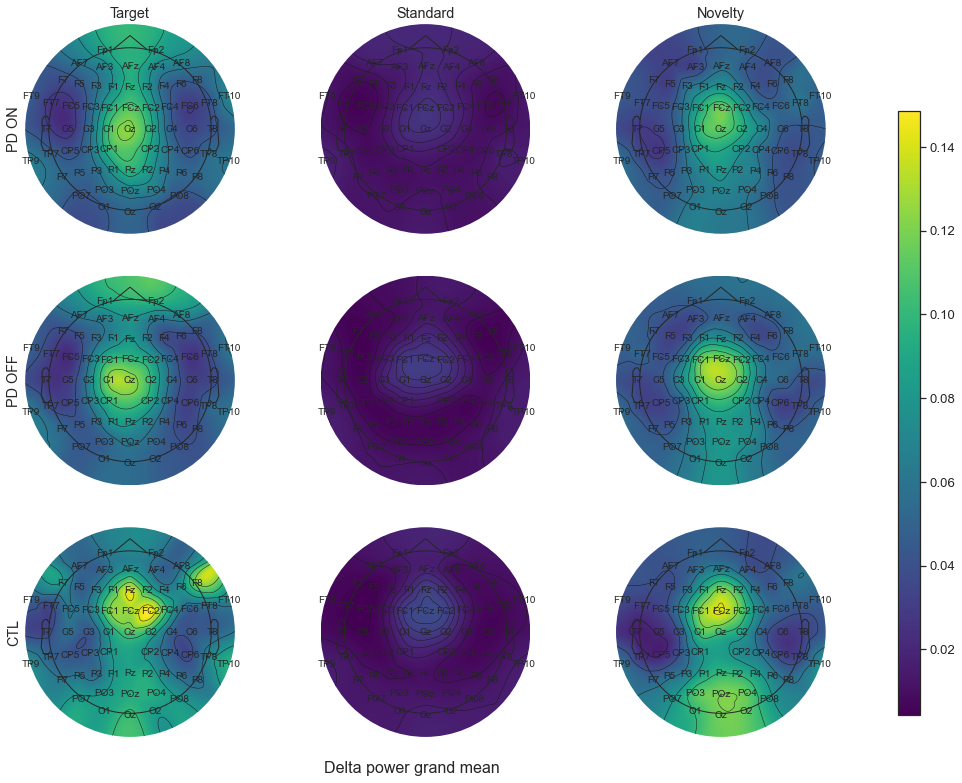

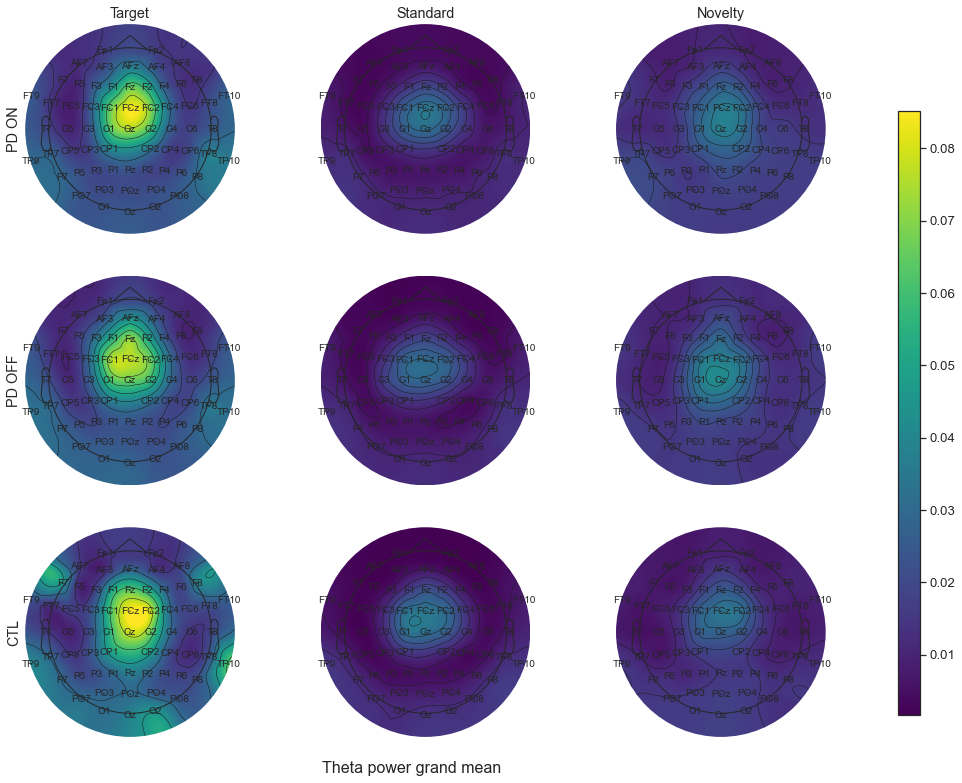

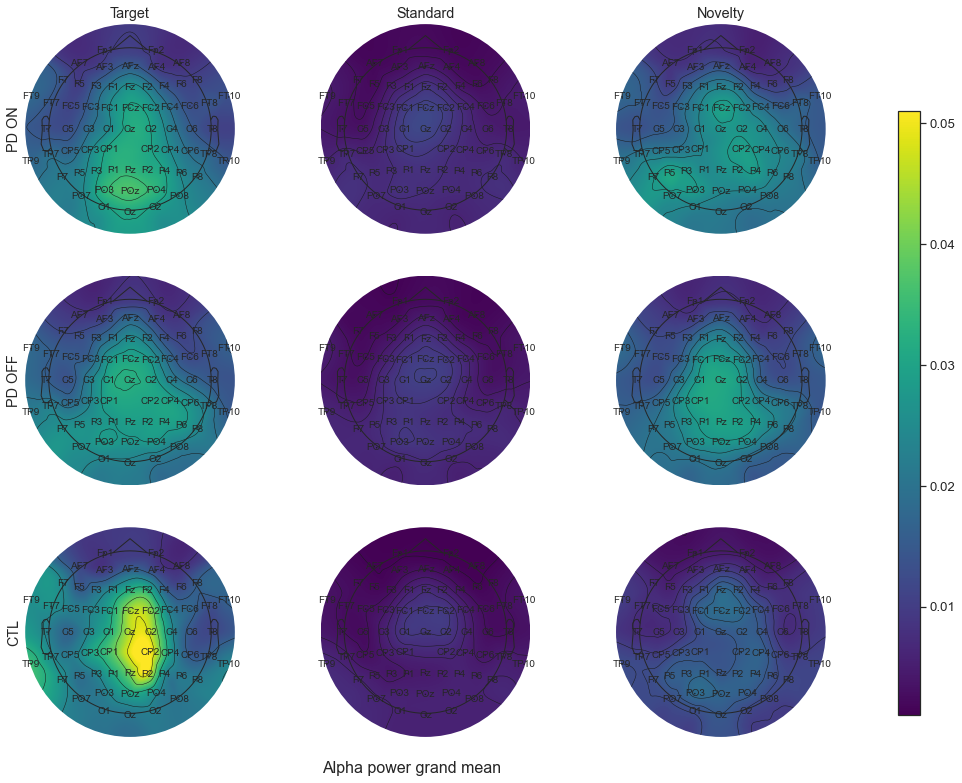

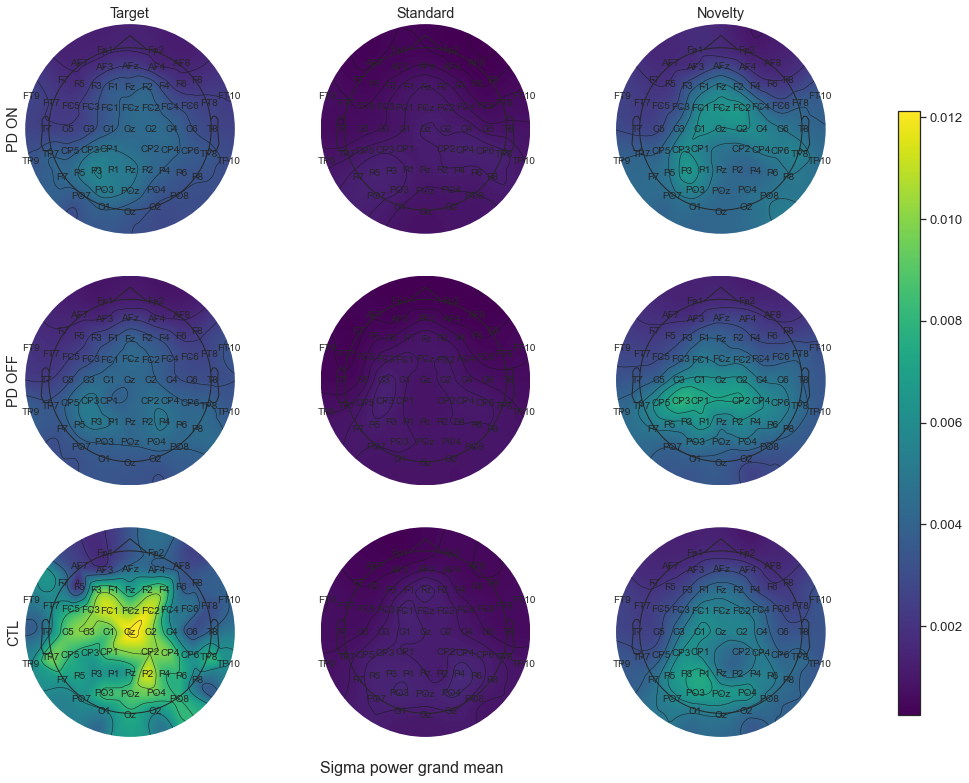

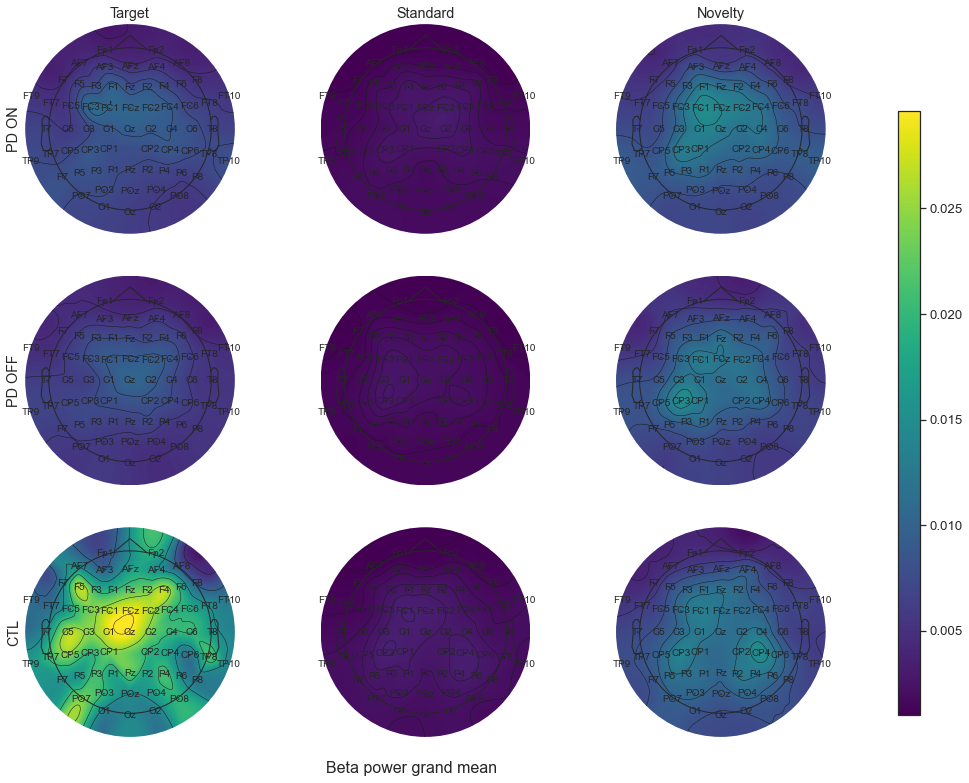

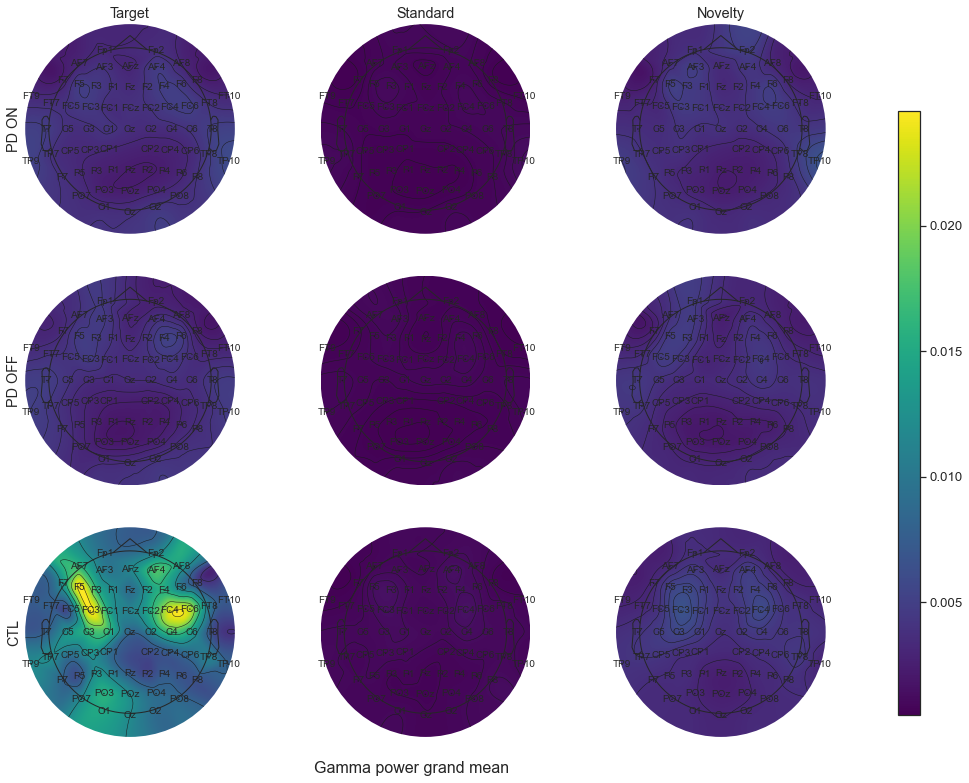

In [129]:
for band_num in np.arange(6):
    fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(15, 12))
    for i in range(3):
        axs[i, 0].set_ylabel(groups[i])
        axs[0, i].set_title(event_types[i])
        axs[-1, i].xaxis.set_visible(True)
        axs[i, 0].yaxis.set_visible(True)

    Data = ERP_collection_power_band[:, :, :, :, band_num]
    power_band_grand_mean = np.mean(Data, axis=1)
    vmax = np.max(power_band_grand_mean)
    vmin = np.min(power_band_grand_mean)
    for i, j in itertools.product(range(3), range(3)):
        #     data = mvls[i, :, j, :].mean(axis=0).reshape((-1, 1))
        temp = np.expand_dims(power_band_grand_mean[i, j, :], axis=1)
        Power_band_grand_mean = mne.EvokedArray(temp, mne_info)
        Power_band_grand_mean.set_montage(montage)
        im, cm = mne.viz.plot_topomap(Power_band_grand_mean.data[:, 0],
                                      Power_band_grand_mean.info, axes=axs[i,
                                                                           j], show=False,
                                      names=channels_name, show_names=True,
                                      vmin=vmin, vmax=vmax, res=200, cmap='viridis', fontsize='medium')

    cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
    clb = fig.colorbar(im, cax=cbar_ax)
    fname = f'{power_bands[band_num]}_power_grand_mean.png'
    title = f'{power_bands[band_num]} power grand mean'
    fig.supxlabel(title, fontsize=16, y=0.08)

    file_path = os.path.join(Path_to_save_fig, fname)
    plt.savefig(file_path)


### Calculation of P value

In [71]:
Path_to_save_fig = 'D:\Mastersharif\MasterProject\Working_with_kiani\\articles\Result_on_articles'
groups = ['PD ON', 'PD OFF', 'CTL']
event_types = ['Target', 'Standard', 'Novelty']


fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(15, 12))
for i in range(3):
    axs[i, 0].set_ylabel(groups[i])
    axs[0, i].set_title(event_types[i])
    axs[-1, i].xaxis.set_visible(True)
    axs[i, 0].yaxis.set_visible(True)

with open('..\data\channels_name.pkl', 'rb') as f:
    channels_name = pickle.load(f)

mne_info = mne.create_info(ch_names=channels_name, sfreq=500., ch_types='eeg')

montage = mne.channels.read_custom_montage('Standard-10-20-Cap81.locs')
band_num = power_bands_num['Delta']
Data = ERP_collection_power_band[:, :, :, :, band_num]
Data_grand_mean = np.mean(Data, axis=1)
vmax = np.max(Data_grand_mean)
vmin = np.min(Data_grand_mean)
for i, j in itertools.product(range(3), range(3)):
    #     data = mvls[i, :, j, :].mean(axis=0).reshape((-1, 1))
    temp = np.expand_dims(Data_grand_mean[i, j, :], axis=1)
    Power_band_grand_mean = mne.EvokedArray(temp, mne_info)
    Power_band_grand_mean.set_montage(montage)
    im, cm = mne.viz.plot_topomap(Power_band_grand_mean.data[:, 0],
                                  Power_band_grand_mean.info, axes=axs[i,
                                                                       j], show=False,
                                  names=channels_name, show_names=True,
                                  vmin=vmin, vmax=vmax, res=200, cmap='viridis', fontsize='medium')


cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
clb = fig.colorbar(im, cax=cbar_ax)
fname = f'Delta_power_grand_mean.png'
title = 'Delta power grand mean'
fig.supxlabel(title, fontsize=16, y=0.08)

file_path = os.path.join(Path_to_save_fig, fname)
plt.savefig(file_path)


{'Delta': [1, 5],
 'Theta': [5, 9],
 'Alpha': [9, 14],
 'Sigma': [15, 18],
 'Beta': [18, 29],
 'Gamma': [30, 41]}